# Training the TD0 Agent

First, we import and initialize everything.

In [31]:
%matplotlib inline
import numpy as np
from copy import deepcopy
from TDagent import *
from MountainEnvironment import *

me = MountainEnvironment()
a = Agent()
a.reset(me)

Next, this problem is going to be very difficult to debug unless we can see and understand the agent in question.

Therefore, the next box builds up a function which we can use to visualize the Q value the agent has learned so far.

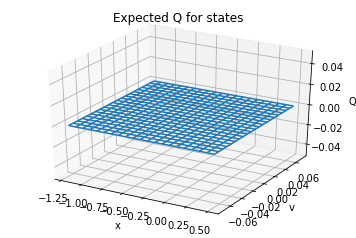

In [32]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

def get_grid(agent, resolution=20):
    xs = [agent.Q.xmin + i*(agent.Q.xmax - agent.Q.xmin)/resolution for i in range(resolution + 1)]
    vs = [agent.Q.vmin + i*(agent.Q.vmax - agent.Q.vmin)/resolution for i in range(resolution + 1)]
    x2 = []
    v2 = []
    for i in range(resolution+1):
        x2.append(deepcopy(xs))
        v2.append([vs[i] for j in range(resolution+1)])
    X = np.array(x2)
    V = np.array(v2)
    return X, V

def get_expectations(X, V, agent):
    """Assumes X, V ar same shape, 2D arrays"""
    w = X.shape[0]
    l = X.shape[1]
    Q = np.zeros((w, l))
    for i in range(w):
        for j in range(l):
            Q[i, j] = agent.expectation((X[i, j], V[i, j]))
    return Q

def plot_expectations(agent, resolution = 20):
    X, V = get_grid(agent, resolution)
    Q = get_expectations(X, V, agent)
    ax.clear()
    ax.plot_wireframe(X, V, Q)
    ax.set_xlabel("x")
    ax.set_ylabel("v")
    ax.set_zlabel("Q")
    ax.set_title("Expected Q for states")

plot_expectations(a)

With that out of the way, we can begin training. We'll begin by training the first episode by hand, and then write an "episode" function. Let's look at the impoact of one step.

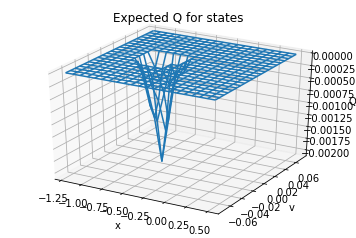

In [33]:
steps = 0

a.move(me)
steps +=1

plot_expectations(a)
fig

Good start. And now, let's look at the effect of 420 steps.

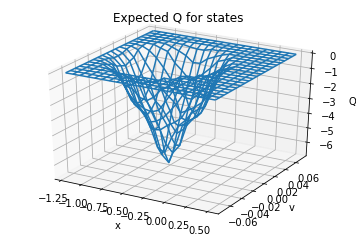

In [34]:
while steps < 420 and (not me.complete):
    a.move(me)
    steps += 1

plot_expectations(a)
fig

Good, roughly what's expected; optimistic expectations encourage exploration further and further. Let's wait till the end of the first episode.

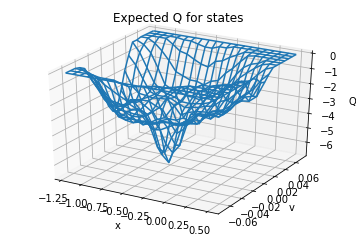

In [35]:
while (not me.complete):
    a.move(me)
    steps += 1

plot_expectations(a)
fig

In [36]:
episodeLengths = [steps]

print(steps)

981


Alright, now let's formalize all of this in a function and run it multiple times.

792


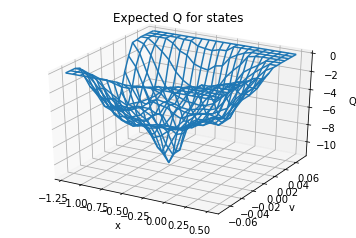

In [37]:
def episode(agent):
    steps = 0
    env = MountainEnvironment() # Need a new object each time.
    a.reset(env)
    while not env.complete:
        a.move(env)
        steps += 1
    return steps

episodeLengths.append(episode(a))
print(episodeLengths[-1])
plot_expectations(a)
fig

668
497
763
269
481
608
336
461
[981, 792, 668, 497, 763, 269, 481, 608, 336, 461]


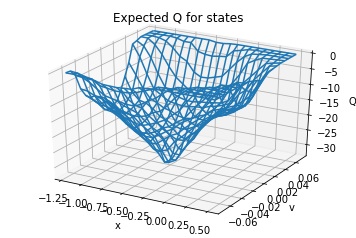

In [38]:
for ep in range(2, 10):
    steps = episode(a)
    episodeLengths.append(steps)
    print(steps)

print(episodeLengths)
plot_expectations(a)
fig

237
243
379
293
275
231
238
192
239
235
154
243
224
186
231
242
218
250
148
161
243
164
155
171
153
195
183
159
195
164
150
192
195
205
146
187
151
163
116
191
155
159
148
199
154
153
188
162
157
154
153
155
161
160
165
152
150
193
146
159
230
118
154
158
185
107
113
172
115
115
113
176
153
164
108
145
145
112
111
112
123
148
150
145
147
145
116
150
149
96
[981, 792, 668, 497, 763, 269, 481, 608, 336, 461, 237, 243, 379, 293, 275, 231, 238, 192, 239, 235, 154, 243, 224, 186, 231, 242, 218, 250, 148, 161, 243, 164, 155, 171, 153, 195, 183, 159, 195, 164, 150, 192, 195, 205, 146, 187, 151, 163, 116, 191, 155, 159, 148, 199, 154, 153, 188, 162, 157, 154, 153, 155, 161, 160, 165, 152, 150, 193, 146, 159, 230, 118, 154, 158, 185, 107, 113, 172, 115, 115, 113, 176, 153, 164, 108, 145, 145, 112, 111, 112, 123, 148, 150, 145, 147, 145, 116, 150, 149, 96]


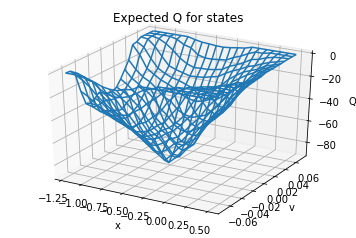

In [39]:
while len(episodeLengths) < 100:
    steps = episode(a)
    episodeLengths.append(steps)
    print(steps)

print(episodeLengths)
plot_expectations(a)
fig

[981, 792, 668, 497, 763, 269, 481, 608, 336, 461, 237, 243, 379, 293, 275, 231, 238, 192, 239, 235, 154, 243, 224, 186, 231, 242, 218, 250, 148, 161, 243, 164, 155, 171, 153, 195, 183, 159, 195, 164, 150, 192, 195, 205, 146, 187, 151, 163, 116, 191, 155, 159, 148, 199, 154, 153, 188, 162, 157, 154, 153, 155, 161, 160, 165, 152, 150, 193, 146, 159, 230, 118, 154, 158, 185, 107, 113, 172, 115, 115, 113, 176, 153, 164, 108, 145, 145, 112, 111, 112, 123, 148, 150, 145, 147, 145, 116, 150, 149, 96, 147, 143, 146, 143, 148, 151, 140, 167, 151, 117, 151, 166, 159, 149, 148, 146, 151, 181, 147, 119, 153, 148, 111, 152, 146, 119, 112, 151, 139, 148, 150, 154, 109, 151, 198, 162, 166, 139, 156, 147, 143, 151, 169, 129, 137, 151, 123, 152, 120, 143, 149, 154, 138, 158, 156, 157, 163, 162, 159, 157, 137, 121, 121, 205, 189, 147, 203, 159, 161, 112, 143, 169, 156, 149, 160, 160, 132, 160, 163, 149, 165, 162, 152, 151, 143, 161, 160, 158, 167, 158, 119, 176, 109, 152, 161, 169, 154, 109, 152, 156, 

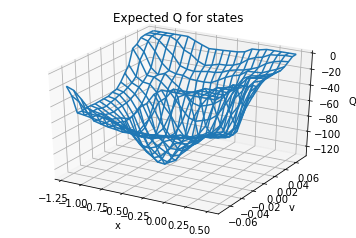

In [40]:
while len(episodeLengths) < 1000:
    steps = episode(a)
    episodeLengths.append(steps)
#    print(steps)

print(episodeLengths)
plot_expectations(a)
fig

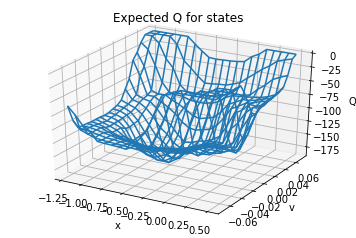

In [41]:
while len(episodeLengths) < 10000:
    steps = episode(a)
    episodeLengths.append(steps)
#    print(steps)

# print(episodeLengths)
plot_expectations(a)
fig

Here's the learning curve:

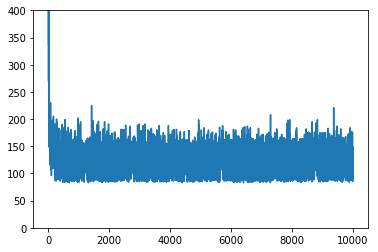

In [44]:
plt.plot(episodeLengths)
plt.ylim([0, 400])
plt.show()

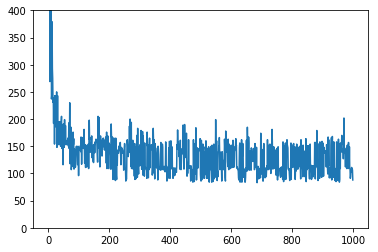

In [45]:
plt.plot(episodeLengths[:1000])
plt.ylim([0, 400])
plt.show()

And here is what a fully trained episode looks like:

Actions
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 0, -1, -1, -1, -1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, -1, -1, -1, 0, 0, -1, -1, -1]






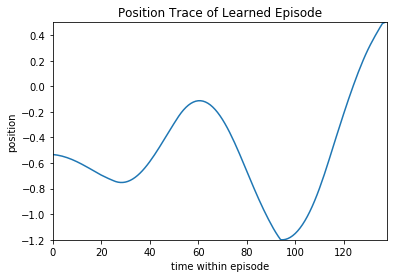

In [48]:
steps = 0
env = MountainEnvironment() # Need a new object each time.
a.reset(env)
throttle = []
xs = []
vs = []
while not env.complete:
    action, _ = a.move(env)
    throttle.append(action)
    xs.append(env.x)
    vs.append(env.v)
    steps += 1
episodeLengths.append(steps)

print("Actions")
print(throttle)
print("\n\n\n")
plt.plot(xs)
plt.xlim([0, len(throttle)])
plt.ylim([a.Q.xmin, a.Q.xmax])
plt.xlabel("time within episode")
plt.ylabel("position")
plt.title("Position Trace of Learned Episode")
plt.show()

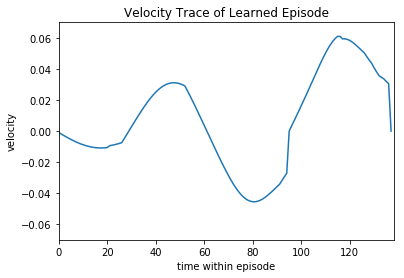

In [49]:
plt.plot(vs)
plt.xlim([0, len(throttle)])
plt.ylim([a.Q.vmin, a.Q.vmax])
plt.xlabel("time within episode")
plt.ylabel("velocity")
plt.title("Velocity Trace of Learned Episode")
plt.show()

And that's the end.